<a href="https://colab.research.google.com/github/saichaitanyakumar/INSE-_6220_-PROJECT/blob/main/Multi-class%20Classification%20with%20PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classification with PyCaret

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

### Install Pycaret

In [28]:
# Install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
# Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

## Import Libraries

In [30]:
import numpy as np

# Open source data analysis and manipulation library for Python
import pandas as pd

# matplotlib - The Python library is needed to plot nice charts
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7,5)

# 'seaborn' - a matplotlib based statistical graphical library
import seaborn as sns; 
sns.set() # Use seaborn plotting style defaults
sns.set_theme(style="darkgrid")


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


## Dataset

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [41]:
# Read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/saichaitanyakumar/INSE-_6220_-PROJECT/main/dairy%20queen%20nut.csv')
df.head(25)

Menu Item  Calories (kcal)  Fat Calories (kcal)  Total Fat (g)  \
0           1              600                  100           27.0   
1           2              830                  170           39.0   
2           3             1100                  230           52.0   
3           4              360                  300           13.0   
4           5              620                  240           22.0   
5           6              890                  350           32.0   
6           7             1170                  470           43.0   
7           8              390                  110           16.0   
8           9              700                  200           30.0   
9          10              960                  290           42.0   
10         11             1240                  390           55.0   
11         12              760                  150           29.0   
12         13              700                  270           31.0   
13         14              360                  380           14.0   
14         15              560                  500           20.0   
15         16              720                  260           25.0   
16         17              940                  270           32.0   
17         18              720                  420           47.0   
18         19              920                  560           63.0   
19         20              720                  440           49.0   
20         21              910                  580           65.0   
21         22              320                  120           13.0   
22         23              460                  220           25.0   
23         24              610                  330           37.0   
24         25              820                  460           51.0   

    Saturated Fat (g)  Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  \
0                21.0            1.0                45          240   
1                31.0            1.0                55          310   
2                41.0            1.5                75          410   
3                 8.0            0.5                45          150   
4                14.0            1.0                85          270   
5                20.0            1.5               120          390   
6                27.0            2.0               160          520   
7                 8.0            0.0                35          160   
8                14.0            1.0                55          290   
9                19.0            1.0                75          400   
10               24.0            1.5                95          520   
11               14.0            0.5                65          390   
12                7.0            0.0               105         2710   
13                9.0            0.5                25          190   
14               13.0            1.0                40          330   
15               15.0            1.0                50          440   
16               19.0            1.5                70          570   
17               19.0            2.0               130         1890   
18               26.0            2.5               180         2300   
19               19.0            2.0               125         1430   
20               27.0            2.5               170         1820   
21                5.0            0.5                35          870   
22               10.0            1.5                70         1030   
23               15.0            2.0               110         1190   
24               19.0            2.0               130         2080   

    Carbohydrates (g)  Sugars (g)  Protein (g)  class  
0                  79          65         12.0      1  
1                 106          86         16.0      1  
2                 140         113         20.0      2  
3                  53          43          8.0      0  
4                  93          75         13.0      0  


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Menu Item            227 non-null    int64  
 1   Calories (kcal)      227 non-null    int64  
 2   Fat Calories (kcal)  227 non-null    int64  
 3   Total Fat (g)        227 non-null    float64
 4   Saturated Fat (g)    227 non-null    float64
 5   Trans Fat (g)        227 non-null    float64
 6   Cholesterol (mg)     227 non-null    int64  
 7   Sodium (mg)          227 non-null    int64  
 8   Carbohydrates (g)    227 non-null    int64  
 9   Sugars (g)           227 non-null    int64  
 10  Protein (g)          227 non-null    float64
 11  class                227 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 21.4 KB


In [43]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [44]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


## Exploratory Data Analysis

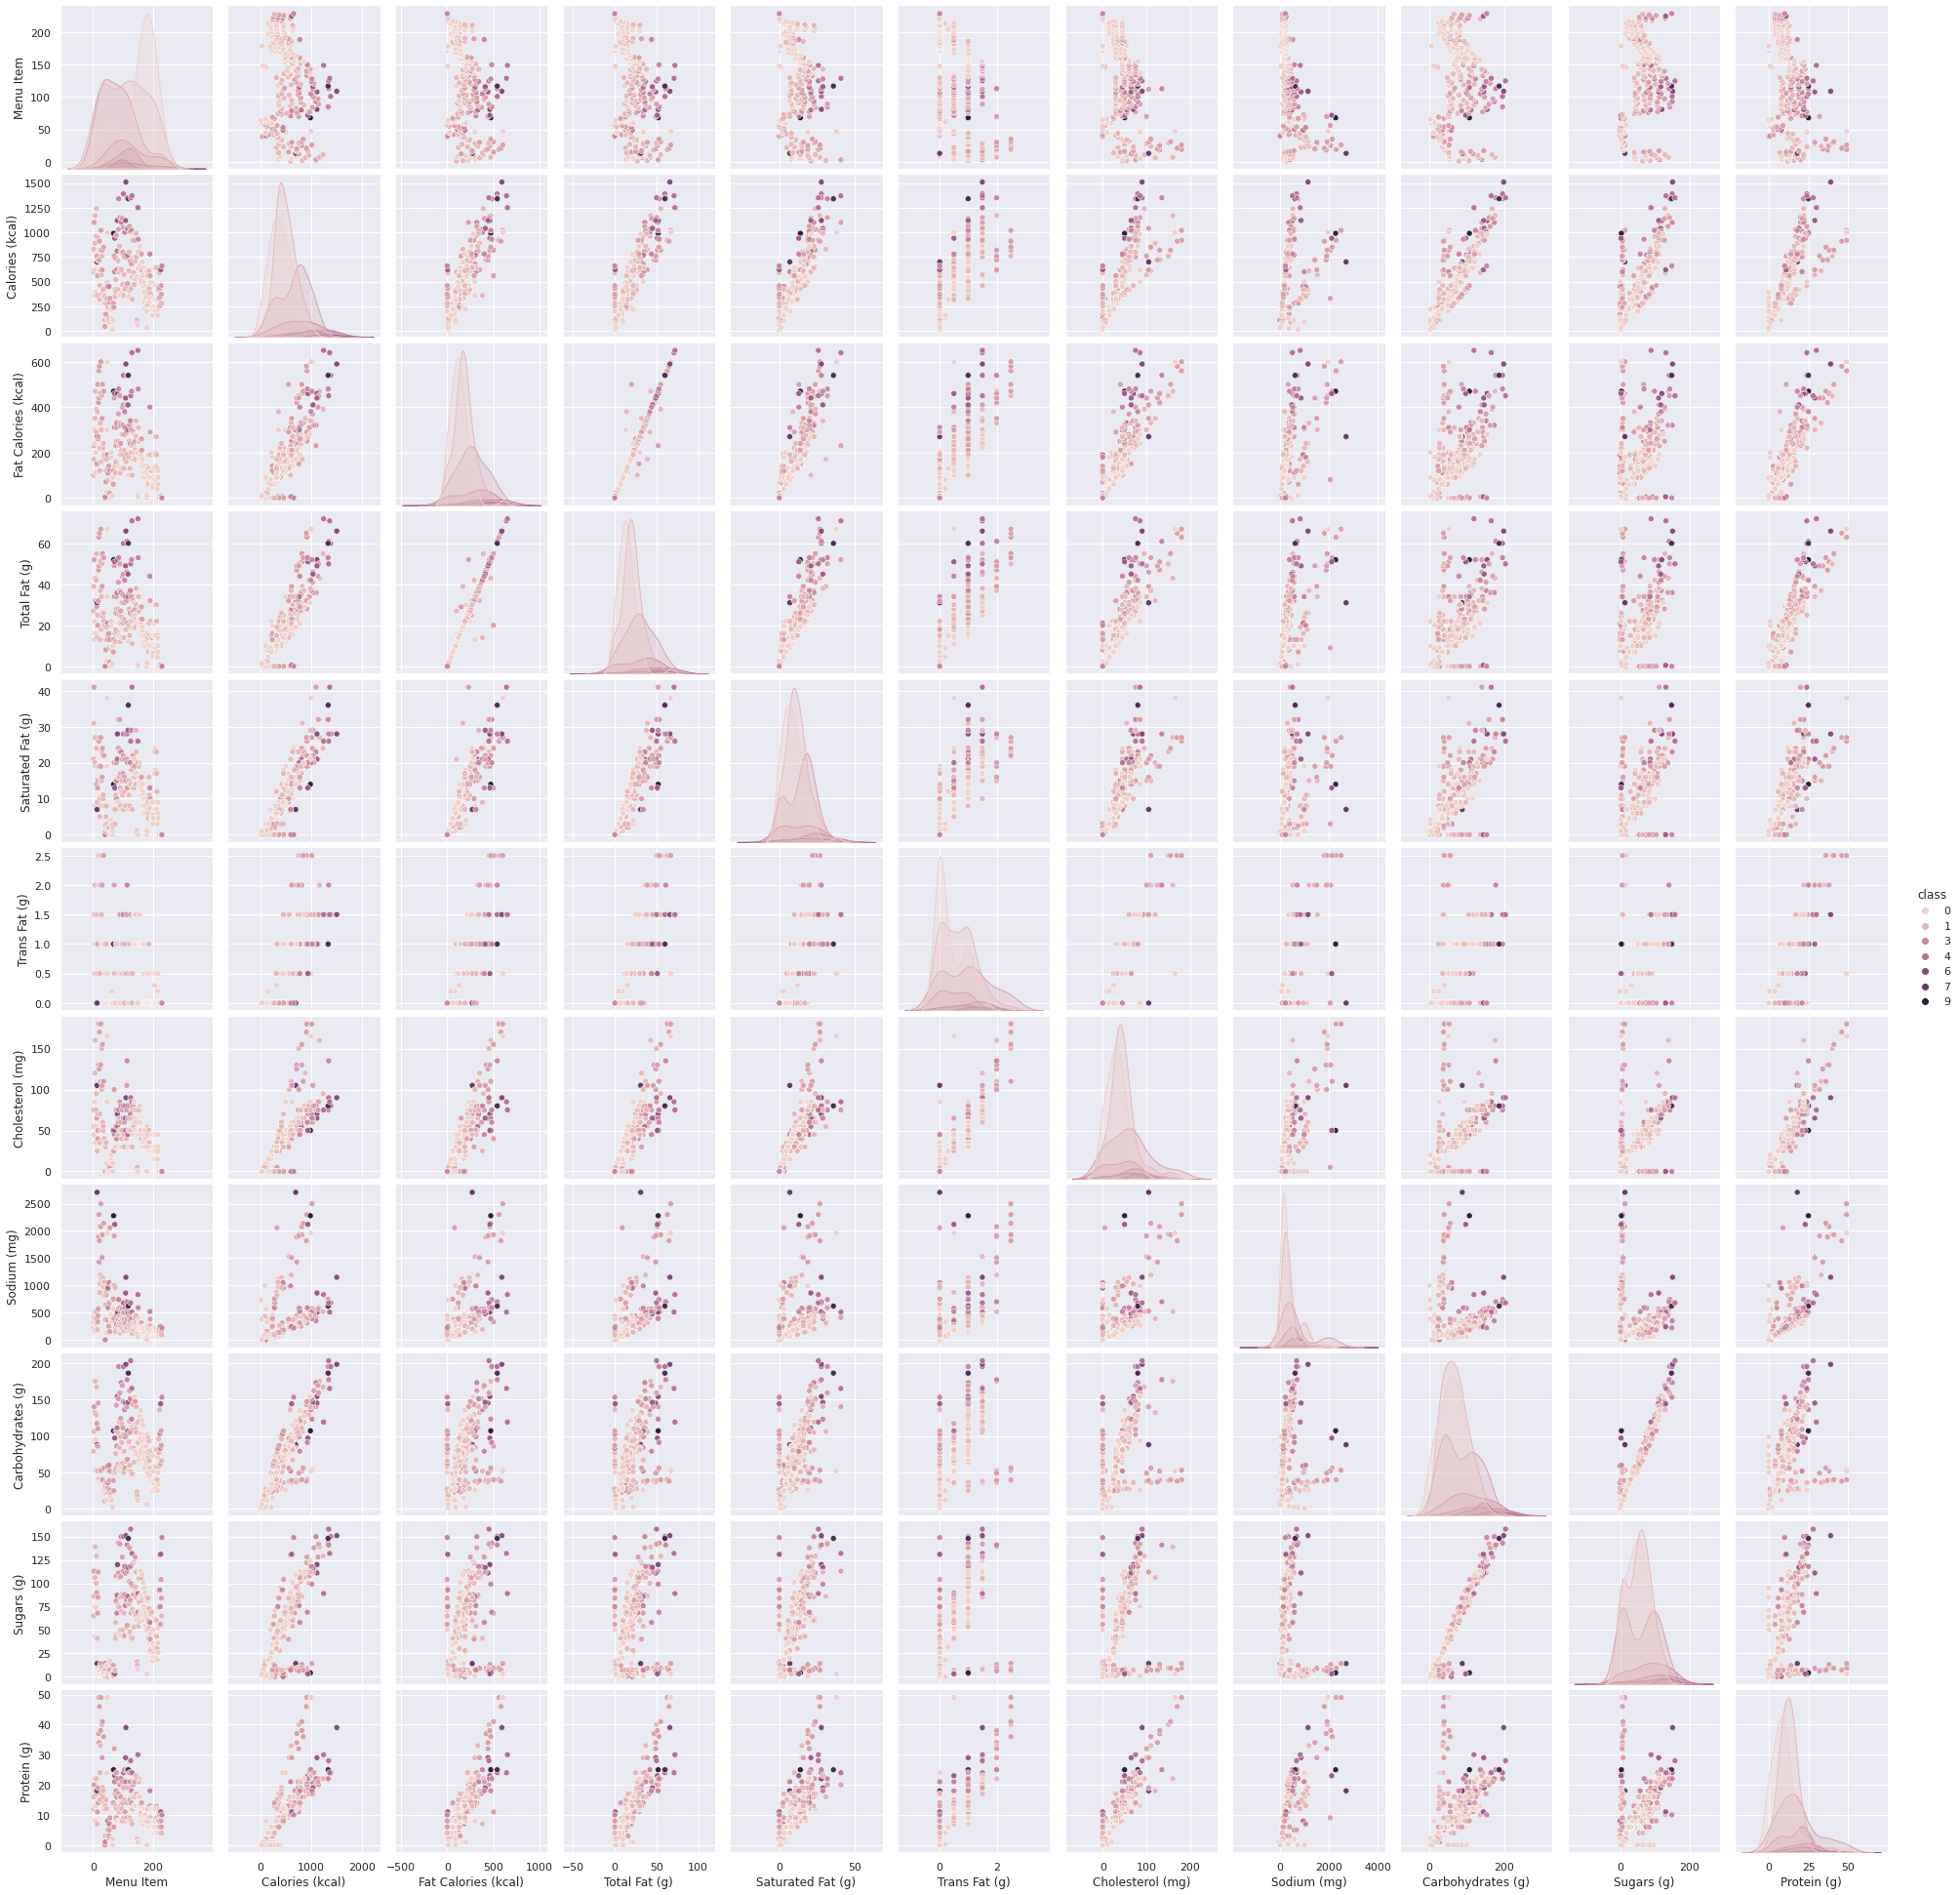

In [45]:
sns.pairplot(df, hue='class')
plt.show()

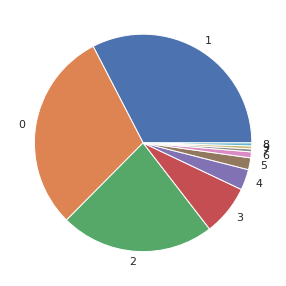

In [46]:
y = df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

### Data Matrix

In [47]:
X = df.drop(columns=['class'])
X.head(10)

Menu Item  Calories (kcal)  Fat Calories (kcal)  Total Fat (g)  \
0          1              600                  100           27.0   
1          2              830                  170           39.0   
2          3             1100                  230           52.0   
3          4              360                  300           13.0   
4          5              620                  240           22.0   
5          6              890                  350           32.0   
6          7             1170                  470           43.0   
7          8              390                  110           16.0   
8          9              700                  200           30.0   
9         10              960                  290           42.0   

   Saturated Fat (g)  Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  \
0               21.0            1.0                45          240   
1               31.0            1.0                55          310   
2               41.0            1.5                75          410   
3                8.0            0.5                45          150   
4               14.0            1.0                85          270   
5               20.0            1.5               120          390   
6               27.0            2.0               160          520   
7                8.0            0.0                35          160   
8               14.0            1.0                55          290   
9               19.0            1.0                75          400   

   Carbohydrates (g)  Sugars (g)  Protein (g)  
0                 79          65         12.0  
1                106          86         16.0  
2                140         113         20.0  
3                 53          43          8.0  
4                 93          75         13.0  
5                132         106         18.0  
6                175         139         22.0  
7                 54          42          8.0  
8                 95          74         13.0  
9                129         100         17.0

In [48]:
X.describe().transpose()

count        mean         std   min    25%    50%    75%  \
Menu Item            227.0  115.480176   66.343323   1.0   58.0  116.0  172.5   
Calories (kcal)      227.0  571.189427  312.098796  15.0  340.0  520.0  760.0   
Fat Calories (kcal)  227.0  208.687225  151.802923   0.0  100.0  180.0  290.0   
Total Fat (g)        227.0   23.206167   16.874851   0.0   12.0   20.0   32.0   
Saturated Fat (g)    227.0   12.264317    8.963456   0.0    5.5   12.0   18.5   
Trans Fat (g)        227.0    0.650661    0.657050   0.0    0.0    0.5    1.0   
Cholesterol (mg)     227.0   46.365639   36.647487   0.0   25.0   45.0   65.0   
Sodium (mg)          227.0  471.299559  516.547386   0.0  175.0  290.0  520.0   
Carbohydrates (g)    227.0   78.114537   44.870464   1.0   40.0   73.0  106.5   
Sugars (g)           227.0   58.748899   42.297445   0.0   15.0   58.0   87.0   
Protein (g)          227.0   13.598238    9.596114   0.0    8.0   12.0   18.0   

                        max  
Menu Item             229.0  
Calories (kcal)      1510.0  
Fat Calories (kcal)   650.0  
Total Fat (g)          72.0  
Saturated Fat (g)      41.0  
Trans Fat (g)           2.5  
Cholesterol (mg)      180.0  
Sodium (mg)          2710.0  
Carbohydrates (g)     203.0  
Sugars (g)            158.0  
Protein (g)            49.0

### Standardize the Data

In [49]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns

X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Menu Item  Calories (kcal)  Fat Calories (kcal)  Total Fat (g)  \
0  -1.729385         0.092516            -0.717558       0.225319   
1  -1.714279         0.831091            -0.255415       0.938007   
2  -1.699173         1.698114             0.140708       1.710087   
3  -1.684066        -0.678170             0.602851      -0.606152   
4  -1.668960         0.156740             0.206728      -0.071635   
5  -1.653853         1.023763             0.932954       0.522272   
6  -1.638747         1.922897             1.725199       1.175570   
7  -1.623640        -0.581834            -0.651538      -0.427980   
8  -1.608534         0.413636            -0.057353       0.403491   
9  -1.593428         1.248546             0.536831       1.116180   

   Saturated Fat (g)  Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  \
0           0.976742       0.532854         -0.037347    -0.448770   
1           2.094849       0.532854          0.236126    -0.312955   
2           3.212956       1.295513          0.783073    -0.118934   
3          -0.476796      -0.229806         -0.037347    -0.623388   
4           0.194068       0.532854          1.056546    -0.390563   
5           0.864932       1.295513          2.013701    -0.157738   
6           1.647606       2.058172          3.107593     0.094489   
7          -0.476796      -0.992465         -0.310820    -0.603986   
8           0.194068       0.532854          0.236126    -0.351759   
9           0.753121       0.532854          0.783073    -0.138336   

   Carbohydrates (g)  Sugars (g)  Protein (g)  
0           0.019777    0.148116    -0.166919  
1           0.622839    0.645697     0.250838  
2           1.382251    1.285444     0.668595  
3          -0.560949   -0.373160    -0.584675  
4           0.332476    0.385059    -0.062479  
5           1.203566    1.119584     0.459716  
6           2.163998    1.901497     0.877473  
7          -0.538613   -0.396854    -0.584675  
8           0.377147    0.361365    -0.062479  
9           1.136559    0.977418     0.355277

In [50]:
X.describe().transpose()

count          mean      std       min       25%  \
Menu Item            227.0  0.000000e+00  1.00221 -1.729385 -0.868320   
Calories (kcal)      227.0 -9.390433e-17  1.00221 -1.786032 -0.742394   
Fat Calories (kcal)  227.0  3.130144e-17  1.00221 -1.377763 -0.717558   
Total Fat (g)        227.0  6.260288e-17  1.00221 -1.378232 -0.665543   
Saturated Fat (g)    227.0  3.912680e-17  1.00221 -1.371281 -0.756323   
Trans Fat (g)        227.0  7.825361e-17  1.00221 -0.992465 -0.992465   
Cholesterol (mg)     227.0  4.695216e-17  1.00221 -1.267975 -0.584293   
Sodium (mg)          227.0  3.130144e-17  1.00221 -0.914420 -0.574883   
Carbohydrates (g)    227.0  1.173804e-16  1.00221 -1.722402 -0.851312   
Sugars (g)           227.0  9.390433e-17  1.00221 -1.392016 -1.036601   
Protein (g)          227.0 -6.260288e-17  1.00221 -1.420188 -0.584675   

                          50%       75%       max  
Menu Item            0.007853  0.861365  1.714878  
Calories (kcal)     -0.164379  0.606307  3.014703  
Fat Calories (kcal) -0.189394  0.536831  2.913567  
Total Fat (g)       -0.190417  0.522272  2.897902  
Saturated Fat (g)   -0.029553  0.697216  3.212956  
Trans Fat (g)       -0.229806  0.532854  2.820831  
Cholesterol (mg)    -0.037347  0.509600  3.654539  
Sodium (mg)         -0.351759  0.094489  4.343547  
Carbohydrates (g)   -0.114236  0.634007  2.789395  
Sugars (g)          -0.017745  0.669391  2.351689  
Protein (g)         -0.166919  0.459716  3.697330

### Observations and variables

In [51]:
observations = list(df.index)
variables = list(df.columns)

### Box and Whisker Plots

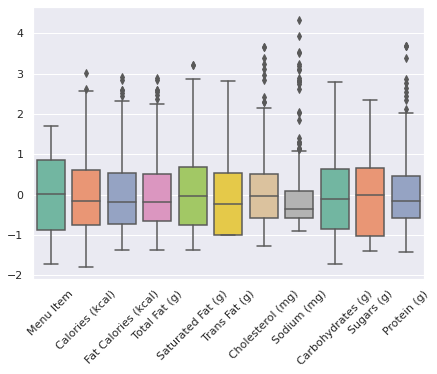

In [52]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

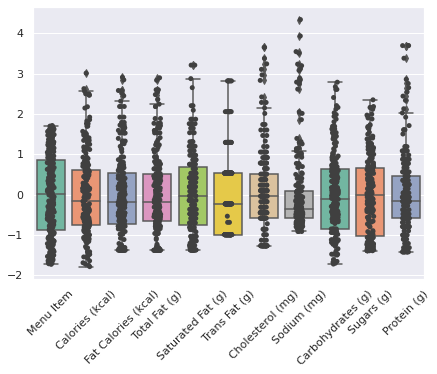

In [53]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Correlation Matrix

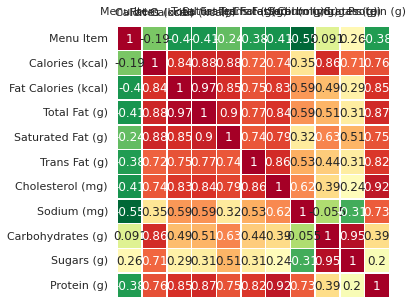

In [54]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

In [55]:
# pca = PCA(n_components=2)
# Retain 95% of useful features and create new dimensions
pca = PCA(0.95)
Z = pca.fit_transform(X)

print("Shape of X:", X.shape)
print("Shape of Z:", Z.shape)

Shape of X: (227, 11)
Shape of Z: (227, 5)


In [56]:
pca.n_components_

5

In [57]:
print(Z)

[[ 0.48907109  0.24054999  1.63913992 -0.52234361 -0.85493831]
 [ 2.04834892 -0.38134899  1.67334136  0.05567532 -0.97070959]
 [ 4.06951118 -1.07209124  1.64766443  0.02647389 -1.14721863]
 ...
 [-2.96922317 -1.61705166 -0.6874293  -0.33606654  0.96142388]
 [-3.35208892 -1.15956976 -0.82963831 -0.25022917  0.56998303]
 [-1.85490549 -3.24651629 -0.20450117 -0.59461562  2.10994029]]


Text(0, 0.5, '$Z_2$')

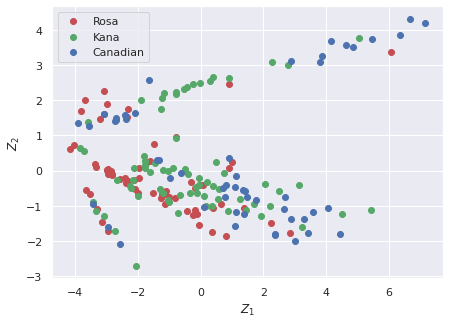

In [58]:
# 1(Rosa)-> 0,  2(Kama)-> 1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa, 0], Z[idx_Rosa, 1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana, 0], Z[idx_Kana, 1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian, 0], Z[idx_Canadian, 1], c='b', label='Canadian')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

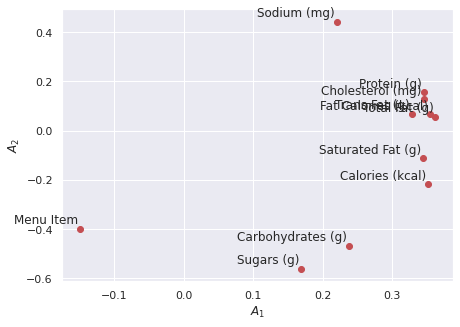

In [59]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


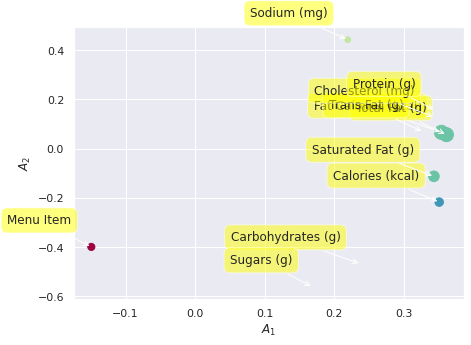

In [60]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

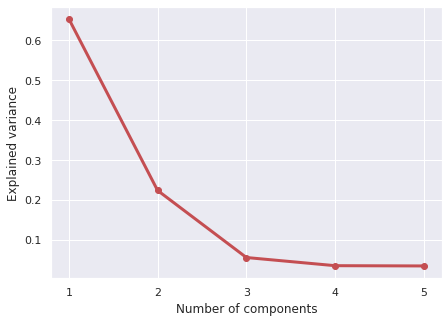

In [61]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

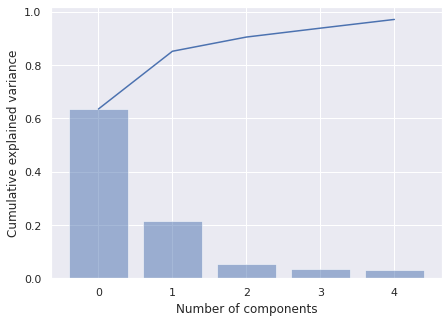

In [62]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

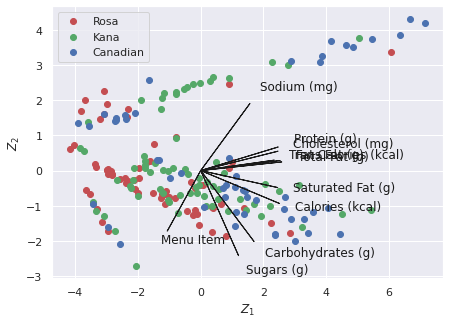

In [63]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [64]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=95884d63ba7cfb2c3e9c675f411c1e73322aadf550b735b729ad4f35048aee56
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=4deb1ccd48f37df239dd3fedc684ddc2863cf5fd477ec91a1a9ded9dcca3a34a
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [65]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [66]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0    0.489071  0.240550  1.639140 -0.522344 -0.854938
1    2.048349 -0.381349  1.673341  0.055675 -0.970710
2    4.069511 -1.072091  1.647664  0.026474 -1.147219
3   -0.780119  0.962329  1.543545 -0.077805 -0.690045
4    0.994446  0.236866  1.466665 -0.832211 -0.522975
..        ...       ...       ...       ...       ...
222 -1.943815 -2.824101 -0.312534 -0.515337  1.973556
223 -2.587672 -2.077377 -0.545849 -0.425778  1.348274
224 -2.969223 -1.617052 -0.687429 -0.336067  0.961424
225 -3.352089 -1.159570 -0.829638 -0.250229  0.569983
226 -1.854905 -3.246516 -0.204501 -0.594616  2.109940

[227 rows x 5 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [227] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [227] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe598c97460>)

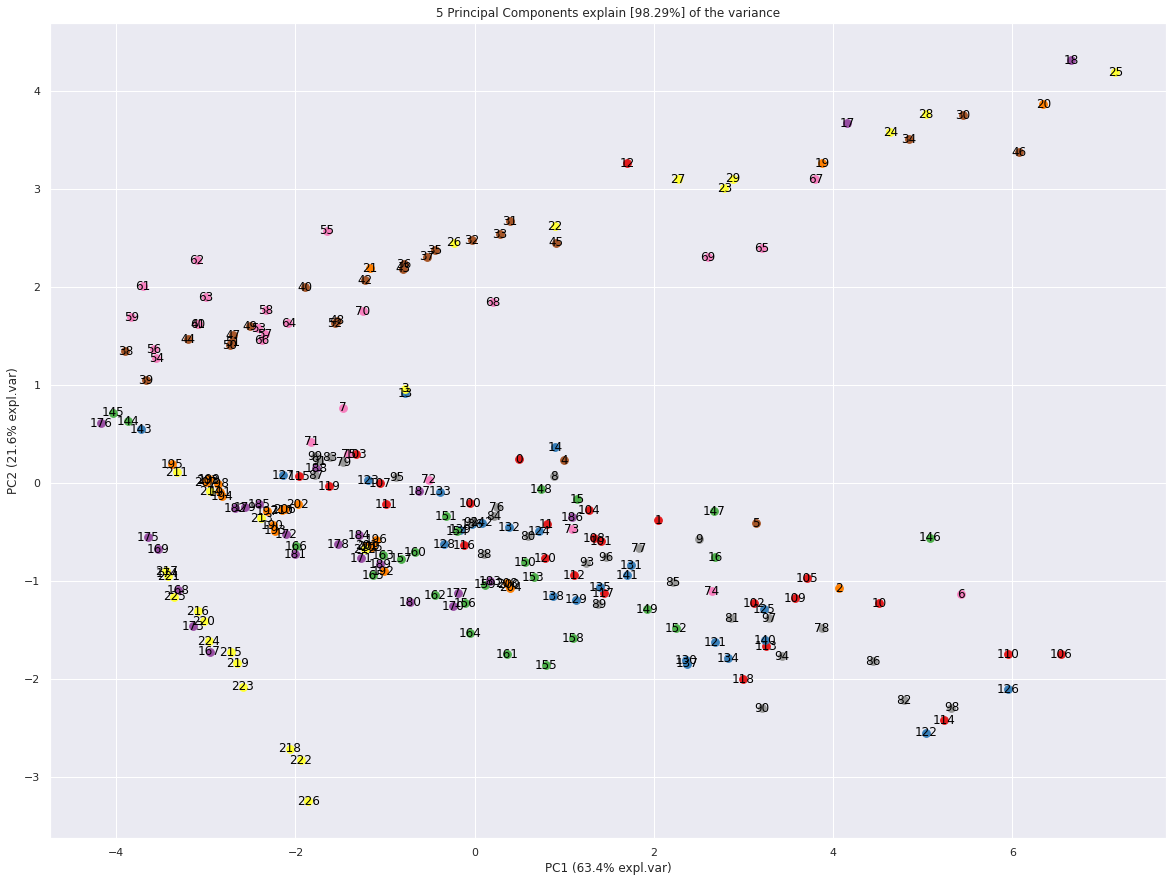

In [67]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [68]:
A = out['loadings'].T

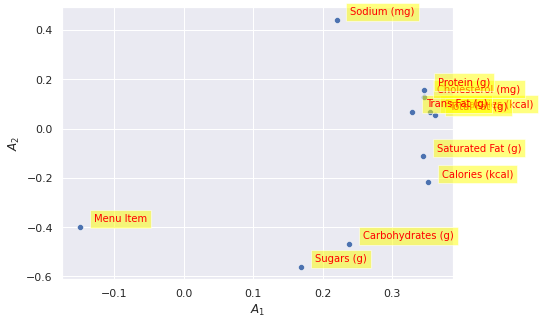

In [69]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

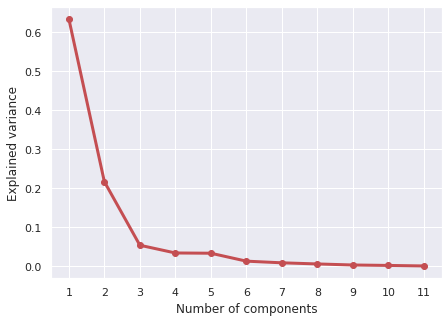

In [70]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

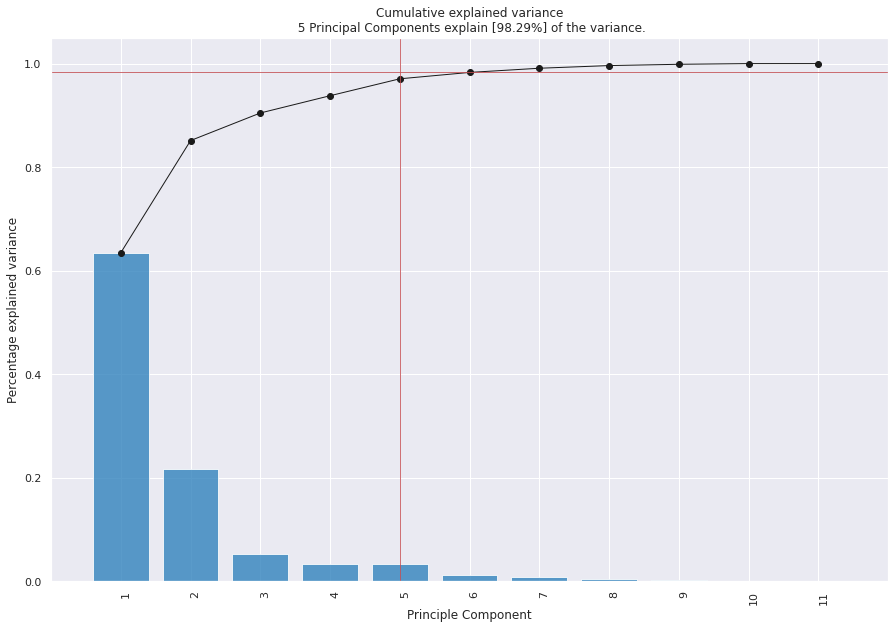

<Figure size 504x360 with 0 Axes>

In [71]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [227] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [227] unique colors! Available unique colors: [9].


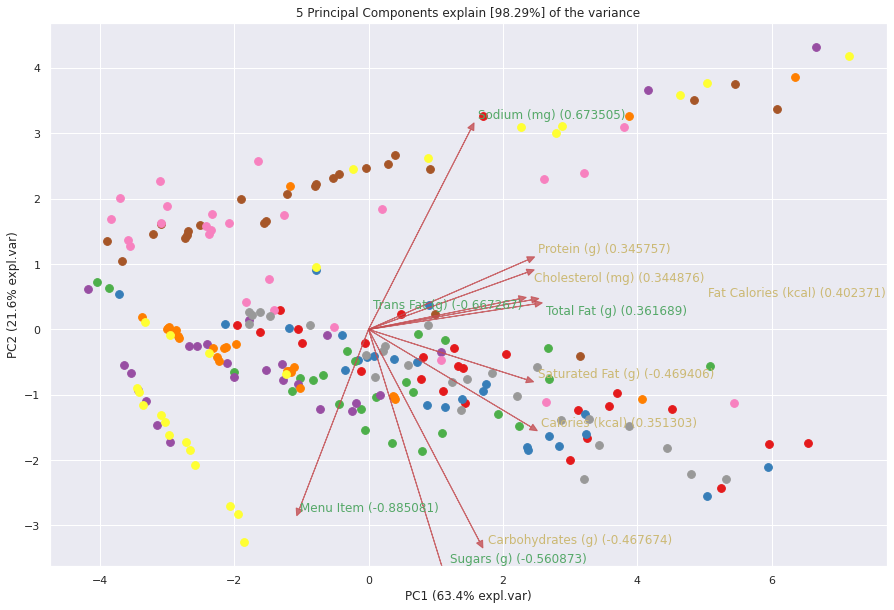

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe58e899af0>)

In [72]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [227] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [227] unique colors! Available unique colors: [9].


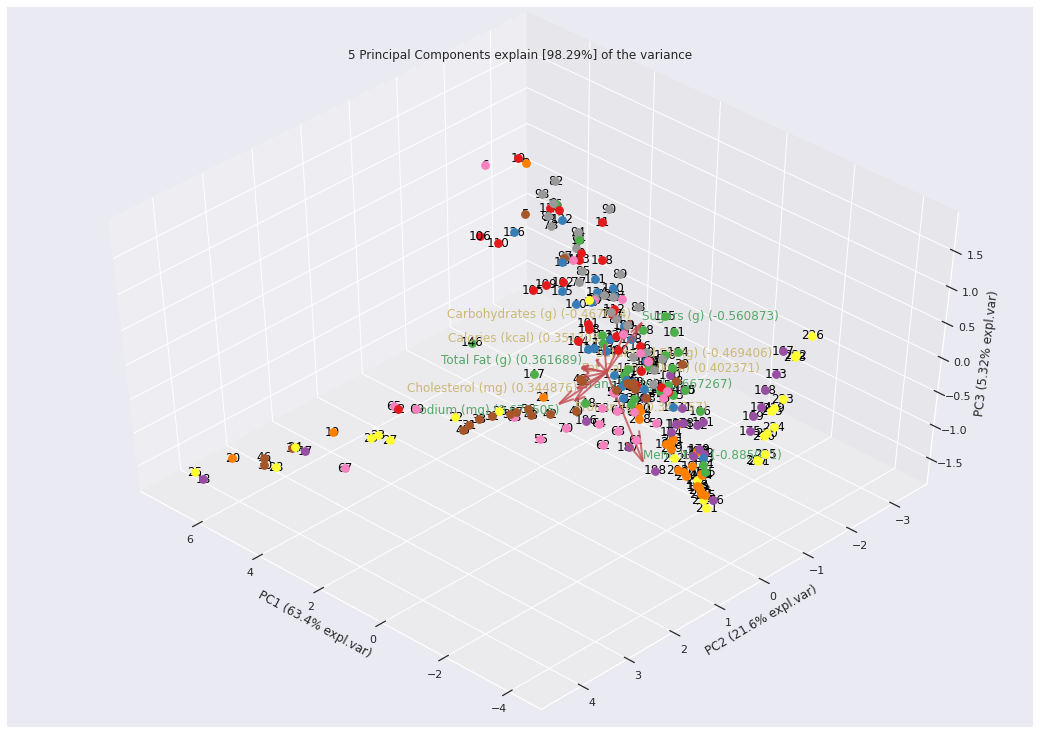

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fe58e55e910>)

In [73]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [74]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [75]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/myconcordia/INSE6220/main/seeds.csv')
df.head(25)

AR     PR      CP     LK     WD      AS     LG  class
0   15.26  14.84  0.8710  5.763  3.312  2.2210  5.220      1
1   14.88  14.57  0.8811  5.554  3.333  1.0180  4.956      1
2   14.29  14.09  0.9050  5.291  3.337  2.6990  4.825      1
3   13.84  13.94  0.8955  5.324  3.379  2.2590  4.805      1
4   16.14  14.99  0.9034  5.658  3.562  1.3550  5.175      1
5   14.38  14.21  0.8951  5.386  3.312  2.4620  4.956      1
6   14.69  14.49  0.8799  5.563  3.259  3.5860  5.219      1
7   14.11  14.10  0.8911  5.420  3.302  2.7000  5.000      1
8   16.63  15.46  0.8747  6.053  3.465  2.0400  5.877      1
9   16.44  15.25  0.8880  5.884  3.505  1.9690  5.533      1
10  15.26  14.85  0.8696  5.714  3.242  4.5430  5.314      1
11  14.03  14.16  0.8796  5.438  3.201  1.7170  5.001      1
12  13.89  14.02  0.8880  5.439  3.199  3.9860  4.738      1
13  13.78  14.06  0.8759  5.479  3.156  3.1360  4.872      1
14  13.74  14.05  0.8744  5.482  3.114  2.9320  4.825      1
15  14.59  14.28  0.8993  5.351  3.333  4.1850  4.781      1
16  13.99  13.83  0.9183  5.119  3.383  5.2340  4.781      1
17  15.69  14.75  0.9058  5.527  3.514  1.5990  5.046      1
18  14.70  14.21  0.9153  5.205  3.466  1.7670  4.649      1
19  12.72  13.57  0.8686  5.226  3.049  4.1020  4.914      1
20  14.16  14.40  0.8584  5.658  3.129  3.0720  5.176      1
21  14.11  14.26  0.8722  5.520  3.168  2.6880  5.219      1
22  15.88  14.90  0.8988  5.618  3.507  0.7651  5.091      1
23  12.08  13.23  0.8664  5.099  2.936  1.4150  4.961      1
24  15.01  14.76  0.8657  5.789  3.245  1.7910  5.001      1

In [76]:
df["class"].unique()
print(df.count())

AR       210
PR       210
CP       210
LK       210
WD       210
AS       210
LG       210
class    210
dtype: int64


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [77]:
data = df.sample(frac=0.9, random_state=786)
print(data.count())
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

AR       189
PR       189
CP       189
LK       189
WD       189
AS       189
LG       189
class    189
dtype: int64
Data for Modeling: (189, 8)
Unseen Data For Predictions: (21, 8)


In [78]:
data_unseen

AR     PR      CP     LK     WD      AS     LG  class
0   14.38  14.21  0.8951  5.386  3.312  2.4620  4.956      1
1   14.16  14.40  0.8584  5.658  3.129  3.0720  5.176      1
2   12.08  13.23  0.8664  5.099  2.936  1.4150  4.961      1
3   13.16  13.82  0.8662  5.454  2.975  0.8551  5.056      1
4   14.49  14.61  0.8538  5.715  3.113  4.1160  5.396      1
5   12.78  13.57  0.8716  5.262  3.026  1.1760  4.782      1
6   18.72  16.19  0.8977  6.006  3.857  5.3240  5.879      2
7   18.98  16.66  0.8590  6.549  3.670  3.6910  6.498      2
8   19.18  16.63  0.8717  6.369  3.681  3.3570  6.229      2
9   17.63  15.86  0.8800  6.033  3.573  3.7470  5.929      2
10  15.99  14.89  0.9064  5.363  3.582  3.3360  5.144      2
11  15.38  14.90  0.8706  5.884  3.268  4.4620  5.795      2
12  11.43  13.13  0.8335  5.176  2.719  2.2210  5.132      3
13  11.83  13.23  0.8496  5.263  2.840  5.1950  5.307      3
14  10.91  12.80  0.8372  5.088  2.675  4.1790  4.956      3
15  10.59  12.41  0.8648  4.899  2.787  4.9750  4.794      3
16  12.11  13.27  0.8639  5.236  2.975  4.1320  5.012      3
17  12.67  13.32  0.8977  4.984  3.135  2.3000  4.745      3
18  11.18  12.72  0.8680  5.009  2.810  4.0510  4.828      3
19  12.19  13.20  0.8783  5.137  2.981  3.6310  4.870      3
20  12.30  13.34  0.8684  5.243  2.974  5.6370  5.063      3

In [79]:
print(data_unseen.count())

AR       21
PR       21
CP       21
LK       21
WD       21
AS       21
LG       21
class    21
dtype: int64


In [80]:
print(data.index)

RangeIndex(start=0, stop=189, step=1)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [81]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (189, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (132, 7)
12                    Transformed Test Set           (57, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f96b
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [82]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.9769  0.9991  0.9750  0.9813   
ridge                    Ridge Classifier    0.9615  0.0000  0.9617  0.9677   
qda       Quadratic Discriminant Analysis    0.9473  0.9910  0.9433  0.9571   
et                 Extra Trees Classifier    0.9401  0.9958  0.9350  0.9546   
nb                            Naive Bayes    0.9253  0.9823  0.9200  0.9368   
rf               Random Forest Classifier    0.9253  0.9859  0.9200  0.9399   
dt               Decision Tree Classifier    0.9181  0.9399  0.9167  0.9306   
lr                    Logistic Regression    0.9170  0.9881  0.9133  0.9315   
gbc          Gradient Boosting Classifier    0.9104  0.9796  0.9067  0.9260   
knn                K Neighbors Classifier    0.9093  0.9824  0.9067  0.9227   
lightgbm  Light Gradient Boosting Machine    0.9093  0.9894  0.9033  0.9223   
svm                   SVM - Linear Kernel    0.8165  0.0000  0.8200  0.8812   
ada                  Ada Boost Classifier    0.7264  0.8609  0.7117  0.6288   
dummy                    Dummy Classifier    0.3176  0.5000  0.3333  0.1012   

              F1   Kappa     MCC  TT (Sec)  
lda       0.9765  0.9651  0.9675     0.017  
ridge     0.9613  0.9423  0.9453     0.008  
qda       0.9463  0.9202  0.9256     0.018  
et        0.9373  0.9090  0.9177     0.244  
nb        0.9234  0.8868  0.8934     0.010  
rf        0.9224  0.8866  0.8954     0.161  
dt        0.9168  0.8767  0.8835     0.009  
lr        0.9161  0.8748  0.8818     0.313  
gbc       0.9079  0.8647  0.8737     0.331  
knn       0.9102  0.8637  0.8691     0.015  
lightgbm  0.9086  0.8631  0.8693     0.205  
svm       0.8092  0.7264  0.7588     0.011  
ada       0.6459  0.5832  0.6670     0.149  
dummy     0.1534  0.0000  0.0000     0.014

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [83]:
best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [84]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7143  0.7889  0.7000  0.7143  0.7143  0.5692  0.5692
1       0.9286  0.9500  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  0.9444  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  0.9444  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.9231  0.9375  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.9231  0.9444  0.9333  0.9385  0.9231  0.8850  0.8929
8       0.8462  0.8889  0.8333  0.8974  0.8359  0.7679  0.7968
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9181  0.9399  0.9167  0.9306  0.9168  0.8767  0.8835
SD      0.0819  0.0603  0.0869  0.0792  0.0828  0.1235  0.1215

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [85]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [86]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8921  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.8571  0.9500  0.8667  0.9048  0.8635  0.7879  0.8062
2       0.9231  0.9359  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.9231  0.9290  0.9167  0.9359  0.9211  0.8829  0.8911
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.9444  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9407  0.9651  0.9383  0.9554  0.9397  0.9105  0.9181
SD      0.0541  0.0377  0.0573  0.0388  0.0553  0.0816  0.0737

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [87]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [90]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [91]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [92]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9286  0.9889  0.9167  0.9405  0.9267  0.8915  0.8985
1       0.8571  0.9813  0.8667  0.9048  0.8635  0.7879  0.8062
2       0.8462  0.9829  0.8333  0.8462  0.8462  0.7679  0.7679
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8462  0.9674  0.8500  0.8615  0.8449  0.7679  0.7748
6       0.9231  0.9375  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.9658  0.7667  0.8000  0.7778  0.6549  0.6607
8       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9093  0.9824  0.9067  0.9227  0.9102  0.8637  0.8691
SD      0.0747  0.0195  0.0750  0.0661  0.0727  0.1118  0.1095

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [93]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9778  0.8667  0.9048  0.8635  0.7879  0.8062
1       0.8571  0.9500  0.8667  0.9048  0.8635  0.7879  0.8062
2       0.8462  0.8889  0.8333  0.8462  0.8462  0.7679  0.7679
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  0.9861  0.9167  0.9359  0.9211  0.8829  0.8911
6       0.9231  0.9375  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.8803  0.7667  0.8000  0.7778  0.6549  0.6607
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9176  0.9621  0.9167  0.9327  0.9193  0.8764  0.8823
SD      0.0785  0.0440  0.0789  0.0669  0.0759  0.1174  0.1137

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [94]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [95]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9849  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9849  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  0.9829  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8462  0.9904  0.8500  0.8615  0.8449  0.7679  0.7748
6       0.9231  0.9818  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.9562  0.7667  0.8000  0.7778  0.6549  0.6607
8       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9170  0.9881  0.9133  0.9315  0.9161  0.8748  0.8818
SD      0.0717  0.0129  0.0741  0.0613  0.0711  0.1078  0.1041

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [96]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9286  1.0000  0.9167  0.9405  0.9267  0.8915  0.8985
1       0.9286  0.9849  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  0.9904  0.9167  0.9359  0.9211  0.8829  0.8911
6       0.9231  0.9562  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.9744  0.7667  0.8000  0.7778  0.6549  0.6607
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9319  0.9897  0.9283  0.9432  0.9319  0.8973  0.9025
SD      0.0638  0.0138  0.0650  0.0551  0.0618  0.0955  0.0935

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [97]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [98]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9325  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.8571  0.9698  0.8500  0.8571  0.8571  0.7846  0.7846
2       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9733  0.8333  0.8901  0.8333  0.7636  0.7937
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9253  0.9859  0.9200  0.9399  0.9224  0.8866  0.8954
SD      0.0568  0.0208  0.0627  0.0468  0.0602  0.0867  0.0795

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [99]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8627  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9425  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  0.9316  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.9231  0.9290  0.9167  0.9359  0.9211  0.8829  0.8911
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.9444  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9478  0.9610  0.9450  0.9592  0.9462  0.9210  0.9275
SD      0.0468  0.0445  0.0522  0.0354  0.0494  0.0713  0.0642

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [100]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [101]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9286  1.0000  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9698  0.9991  0.9700  0.9758  0.9695  0.9546  0.9577
SD      0.0370  0.0026  0.0371  0.0296  0.0374  0.0557  0.0519

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [102]:
tuned_best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [103]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [104]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (189, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (132, 3)
12                    Transformed Test Set           (57, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              29d4
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [106]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.9324  0.9809  0.9300  0.9456   
lr                    Logistic Regression    0.9247  0.9830  0.9217  0.9377   
nb                            Naive Bayes    0.9247  0.9851  0.9217  0.9333   
rf               Random Forest Classifier    0.9247  0.9694  0.9250  0.9415   
lda          Linear Discriminant Analysis    0.9247  0.9865  0.9233  0.9379   
et                 Extra Trees Classifier    0.9176  0.9746  0.9167  0.9322   
lightgbm  Light Gradient Boosting Machine    0.9176  0.9658  0.9150  0.9339   
ridge                    Ridge Classifier    0.9170  0.0000  0.9167  0.9313   
qda       Quadratic Discriminant Analysis    0.9093  0.9850  0.9067  0.9195   
svm                   SVM - Linear Kernel    0.9027  0.0000  0.9017  0.9156   
gbc          Gradient Boosting Classifier    0.8874  0.9664  0.8850  0.8996   
dt               Decision Tree Classifier    0.8868  0.9150  0.8833  0.9126   
ada                  Ada Boost Classifier    0.8516  0.9552  0.8517  0.8977   
dummy                    Dummy Classifier    0.3176  0.5000  0.3333  0.1012   

              F1   Kappa     MCC  TT (Sec)  
knn       0.9307  0.8979  0.9051     0.026  
lr        0.9230  0.8863  0.8934     0.037  
nb        0.9234  0.8864  0.8912     0.010  
rf        0.9229  0.8869  0.8961     0.178  
lda       0.9232  0.8865  0.8936     0.021  
et        0.9158  0.8762  0.8841     0.291  
lightgbm  0.9155  0.8758  0.8847     0.052  
ridge     0.9140  0.8751  0.8842     0.009  
qda       0.9079  0.8632  0.8687     0.017  
svm       0.8996  0.8531  0.8627     0.016  
gbc       0.8863  0.8299  0.8367     0.291  
dt        0.8850  0.8291  0.8425     0.012  
ada       0.8412  0.7775  0.8003     0.122  
dummy     0.1534  0.0000  0.0000     0.015

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [107]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [108]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9778  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9425  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  0.9829  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8462  0.9637  0.8500  0.8462  0.8462  0.7679  0.7679
7       0.9231  0.9744  0.9167  0.9385  0.9219  0.8839  0.8919
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9401  0.9833  0.9367  0.9502  0.9386  0.9094  0.9151
SD      0.0557  0.0183  0.0595  0.0489  0.0577  0.0846  0.0800

INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [109]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [110]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [111]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import shap

In [113]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8881  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9611  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9487  0.8667  0.8974  0.8423  0.7719  0.8001
7       0.8462  0.9177  0.8500  0.8615  0.8462  0.7699  0.7768
8       0.9231  0.9786  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9247  0.9694  0.9250  0.9415  0.9229  0.8869  0.8961
SD      0.0583  0.0381  0.0588  0.0453  0.0602  0.0875  0.0798

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [114]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9254  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9532  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9904  0.8667  0.8974  0.8423  0.7719  0.8001
7       0.8462  0.9647  0.8500  0.8615  0.8462  0.7699  0.7768
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9247  0.9825  0.9250  0.9415  0.9229  0.8869  0.8961
SD      0.0583  0.0247  0.0588  0.0453  0.0602  0.0875  0.0798

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


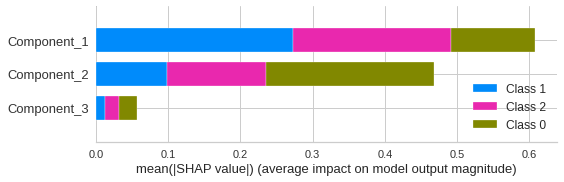

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [115]:
interpret_model(tuned_rf_pca, plot='summary')

In [116]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [117]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [118]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
